In [5]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import numpy as np

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

#Read data
df = pd.read_csv(r'D:\CODE\python\My_covid_project\Data\table for finding correlation.csv')

In [2]:
df.head()

,continent,location,date,population,total cases,new cases,total deaths,new deaths,icu patients,hosp patients,total tests,people vaccinated,people fully vaccinated,total boosters,stringency index,handwashing facilities,hospital beds per thousand,case increasing rate,death increasing rate
0,NaN,Low income,2020-02-28,665149040,5,0,0,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.00000,0.0
1,NaN,Low income,2020-03-05,665149040,5,0,0,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.00000,0.0
2,NaN,Low income,2020-03-20,665149040,135,35,2,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,35.00000,0.0
3,Africa,Togo,2020-03-28,8478242,25,0,1,0,0,0,362.0,0.0,0.0,0.0,69.44,10.475,0.700,0.00000,0.0
4,Europe,Montenegro,2020-04-07,628051,241,8,2,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN,3.861,3.43348,0.0


In [6]:
# check missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

continent - 0.028753796896806502%
location - 0.0%
date - 0.0%
population - 0.0%
total cases - 0.0%
new cases - 0.0%
total deaths - 0.0%
new deaths - 0.0%
icu patients - 0.0%
hosp patients - 0.0%
total tests - 0.3541923213748187%
people vaccinated - 0.3471321456913773%
people fully vaccinated - 0.36624661357852395%
total boosters - 0.5177804230632406%
stringency index - 0.19841693347563144%
handwashing facilities - 0.5765331253591659%
hospital beds per thousand - 0.23598226746572531%
case increasing rate - 0.0%
death increasing rate - 0.0%


#### missing value percent less than 5% ==> acceptable

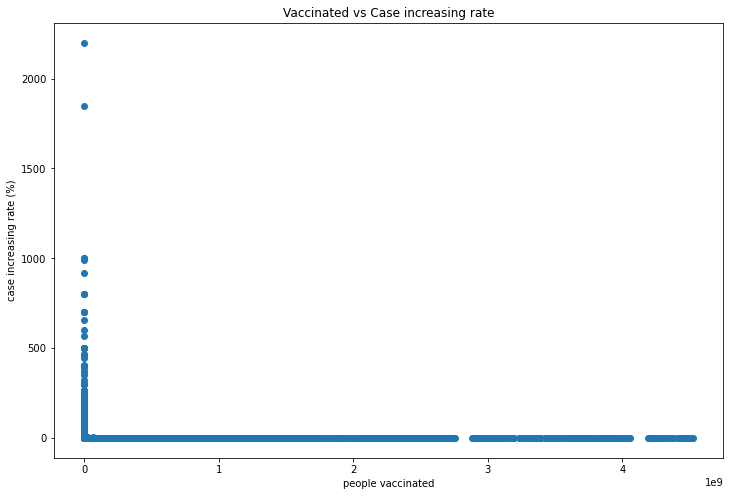

In [16]:
# scatter plot with people vaccinated vs case increasing rate

plt.scatter(x=df['people vaccinated'], y= df['case increasing rate'])
plt.title('Vaccinated vs Case increasing rate')
plt.xlabel('people vaccinated')
plt.ylabel('case increasing rate (%)')
plt.show()

<AxesSubplot:>

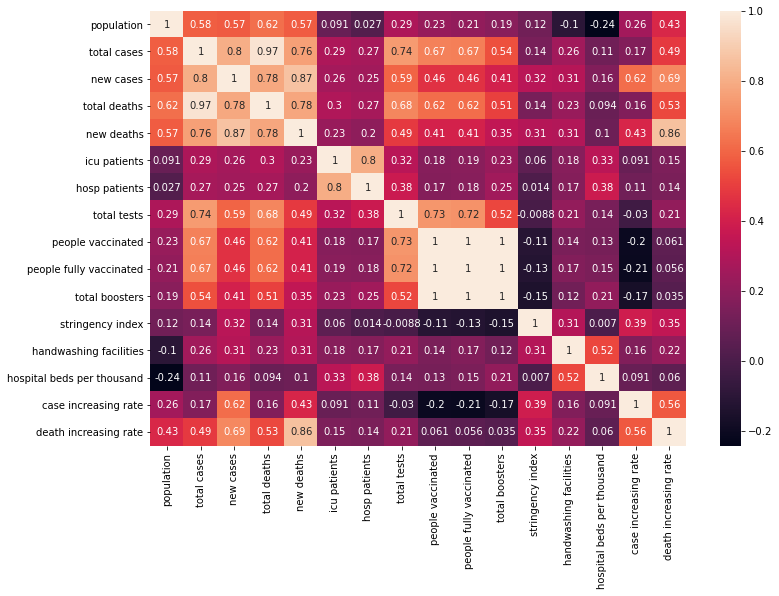

In [6]:
# show correlation by spearman method
correlation_matrix = df.corr(method ='spearman') #pearson, kendall, spearman
sns.heatmap(correlation_matrix, annot = True)

In [7]:
#divide into pair
pd.set_option('display.max_rows', 500)

matrix = df.corr(method = 'spearman')
corr_pairs = matrix.unstack()
corr_pairs = corr_pairs.sort_values()

need_to_evaluate_corr_pairs = corr_pairs[(abs(corr_pairs) >= 0.2) & (corr_pairs < 1)]

print(need_to_evaluate_corr_pairs)

hospital beds per thousand  population                   -0.242860
population                  hospital beds per thousand   -0.242860
case increasing rate        people fully vaccinated      -0.211088
people fully vaccinated     case increasing rate         -0.211088
people vaccinated           case increasing rate         -0.204699
case increasing rate        people vaccinated            -0.204699
new deaths                  hosp patients                 0.201402
hosp patients               new deaths                    0.201402
total tests                 death increasing rate         0.209394
death increasing rate       total tests                   0.209394
total boosters              hospital beds per thousand    0.210326
hospital beds per thousand  total boosters                0.210326
population                  people fully vaccinated       0.213252
people fully vaccinated     population                    0.213252
total tests                 handwashing facilities        0.21

In [33]:
#finding which affect cases increasing rate
print(need_to_evaluate_corr_pairs['case increasing rate'])

people fully vaccinated   -0.211088
people vaccinated         -0.204699
population                 0.260470
stringency index           0.388845
new deaths                 0.425994
death increasing rate      0.563737
new cases                  0.618598
dtype: float64


##### ==> Vaccinated is the best way to reduce the cases increasing rate
##### and High poplation result in the control case increasing rate because of the more people the harder to control
('stringency index', 'new deaths', 'death increasing rate' increase when because of the new cases increasing;
 
 'new cases' is used for calculating the case increasing rate )

In [8]:
#finding which affect death increasing rate
print(need_to_evaluate_corr_pairs['death increasing rate'])

total tests               0.209394
handwashing facilities    0.222286
stringency index          0.346474
population                0.427256
total cases               0.486088
total deaths              0.527416
case increasing rate      0.563737
new cases                 0.693178
new deaths                0.862121
dtype: float64


##### ==> 'death increasing rate' increase when 'total cases', 'new cases', 'case increasing rate' increase
##### and High poplation also result in the control deaths increasing rate because of the more people the harder to control
( 'total tests', 'handwashing facilities','stringency index' increases because of trying to reduce death increasing;
  
  'total deaths' increases because of the 'new deaths' increases
  
  'new deaths' is used for calculate 'death increasing rate'
)

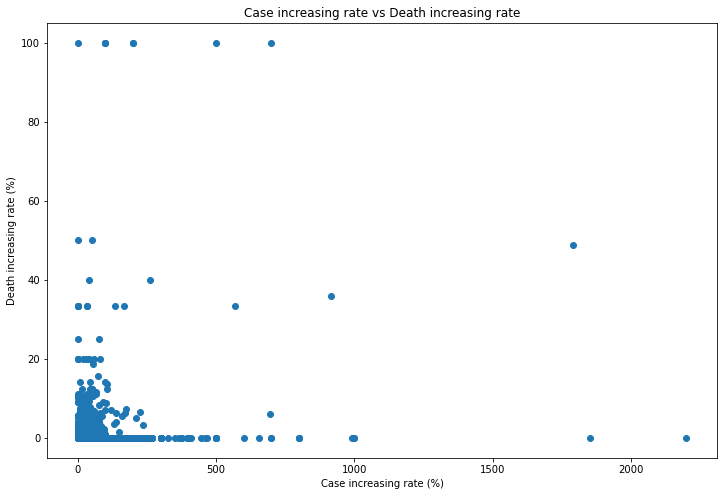

In [10]:
## scatter plot with Case increasing rate vs Death increasing rate

plt.scatter(x=df['case increasing rate'], y= df['death increasing rate'])
plt.title('Case increasing rate vs Death increasing rate')
plt.xlabel('Case increasing rate (%)')
plt.ylabel('Death increasing rate (%)')
plt.show()